# <font color='purple'>Problem </font>
<hr style='border: 2px solid purple;'>

**What is the risk of customers delaying the payment of the bank-statement?**

<hr style='border: 2px point green;'>

**What is the behavior of customers with credit cards?**

<hr style='border: 2px point green;'>

# <font color='purple'>Solution</font>
<hr style='border: 2px solid purple;'>

**Grouping clients based on characteristics**

# <font color='red'>Importing</font>
<hr style='border: 2px solid red;'>

In [28]:
import pandas as pd

In [29]:
data = pd.read_csv('./CC_GENERAL.csv', sep =',')

In [30]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

# <font color='red'>Organizing the data</font>
<hr style='border: 2px solid red;'>

### <font color='green'>Eliminating Unnecessary Data</font>
<hr style='border: 1px solid green;'>

In [31]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [32]:
data.drop(columns=['CUST_ID', 'TENURE'], inplace = True) 

### <font color='green'>Missing Data</font>
<hr style='border: 1px solid green;'>

In [33]:
missing = data.isna().sum()

In [34]:
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

**<font color = 'blue' > Instead of dropping the null values we will fill it with the median of the values:** </font>

In [35]:
data.fillna(data.median(), inplace = True)

In [36]:
missing = data.isna().sum()

In [37]:
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

### <font color='green'>Normalizing the Data</font>
<hr style='border: 1px solid green;'>

In [38]:
from sklearn.preprocessing import Normalizer 

In [39]:
values = Normalizer().fit_transform(data.values)

**<font color = 'blue' >Now all the values have value between 0 and 1** </font>

# <font color='red'>Clustering</font>
<hr style='border: 2px solid red;'>

In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)

In [42]:
y_pred = kmeans.fit_predict(values) 

### <font color='green'>Calculating the Silhouette to validate the cluster</font>
<hr style='border: 1px solid green;'>

**<font color = 'blue' >Is necessary to validate the clusters in order to proceed with the analysis**</font>

In [43]:
from sklearn import metrics

In [44]:
labels = kmeans.labels_

In [46]:
silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')

In [47]:
silhouette

0.36454120823535374

**<font color = 'blue' >The Silhouette value is between -1 and 1 and every positive value is considered good**</font>

### <font color='green'>Calculating the Davies_bouldin to validate the cluster</font>
<hr style='border: 1px solid green;'>

In [48]:
dbs = metrics.davies_bouldin_score(values,labels)

In [49]:
dbs

1.0759109484969387

### <font color='green'>Calculating the Calinski to validate the cluster</font>
<hr style='border: 1px solid green;'>

In [50]:
calinski = metrics.calinski_harabasz_score(values, labels)

In [51]:
calinski

3431.794135866532

# <font color='red'>Validating the clusters</font>
<hr style='border: 2px solid red;'>

**<font color = 'blue' >Based on the upper values, how much more close to 1, better**</font>

**<font color = 'blue' >To adapt our results, we will change our Kmeans using functions to get the best value for clusters**</font>

In [61]:
def clustering_algorithm(n_clusters, dataset) :
    kmeans = KMeans(n_clusters = n_clusters, n_init = 10, max_iter = 300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric = 'euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [62]:
s1, dbs1, caliski1 = clustering_algorithm(12, values)
print(s1, dbs1, caliski1)

0.30782968362322566 1.0991245055279657 2921.300152624711


In [63]:
s2, dbs2, caliski2 = clustering_algorithm(5, values)
print(s2, dbs2, caliski2)

0.36454411415175675 1.0759640420985468 3431.7970107150363


In [64]:
s3, dbs3, caliski3 = clustering_algorithm(8, values)
print(s3, dbs3, caliski3)

0.32005800147159563 1.1476253202231481 3214.2095531595396


In [65]:
s4, dbs4, caliski4 = clustering_algorithm(20, values)
print(s4, dbs4, caliski4)

0.26748851478556895 1.2421593726586528 2398.6041957976104


In [66]:
s5, dbs5, caliski5 = clustering_algorithm(50, values)
print(s5, dbs5, caliski5)

0.2509954919299779 1.2204336028439788 1619.349678858814


**<font color = 'blue' >Based on the results, the Silhouette with 5 clusters Probably will give us better results**</font>

**<font color = 'blue' >You don't have a lot of variation and the values are good**</font>

### <font color='green'>Validating using random data</font>
<hr style='border: 1px solid green;'>

**<font color = 'blue' >Validating using a random data of the same proportion**</font>

In [67]:
data.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [68]:
import numpy as np

In [69]:
random_data = np.random.rand(8950,16)

In [70]:
s, dbs, calinski = clustering_algorithm(5, random_data)

**<font color = 'blue' >Values for random data**</font>

In [71]:
print(s, dbs, calinski)

0.039949586457952886 3.4791222371839665 302.7050843730546


**<font color = 'blue' >Values of our cluster**</font>

In [72]:
print(s2, dbs2, caliski2)

0.36454411415175675 1.0759640420985468 3431.7970107150363


### <font color='green'>Validating the stability for the clusters</font>
<hr style='border: 1px solid green;'>

**The idea is that we split the database and run the kmeans for each of these divisions in order to obtain similar results for the metrics, as we want the kmeans to behave similarly in each one to achieve validation.**

In [73]:
set1, set2, set3 = np.array_split(values, 3)

In [75]:
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

In [76]:
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36897094584161894 1.0581656052369077 1204.0560966145406
0.35406999696241026 1.1389554530299941 1194.945411949724
0.3668564117315988 1.099352525345635 1167.5313082261503


**<font color = 'blue' >The values are pretty close so the clusters are stable**</font>

# <font color='red'>Visualizing the clusters</font>
<hr style='border: 2px solid red;'>

In [77]:
data.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

### <font color='green'>Visualizing purchases and payments</font>
<hr style='border: 1px solid green;'>

In [78]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Purchases')

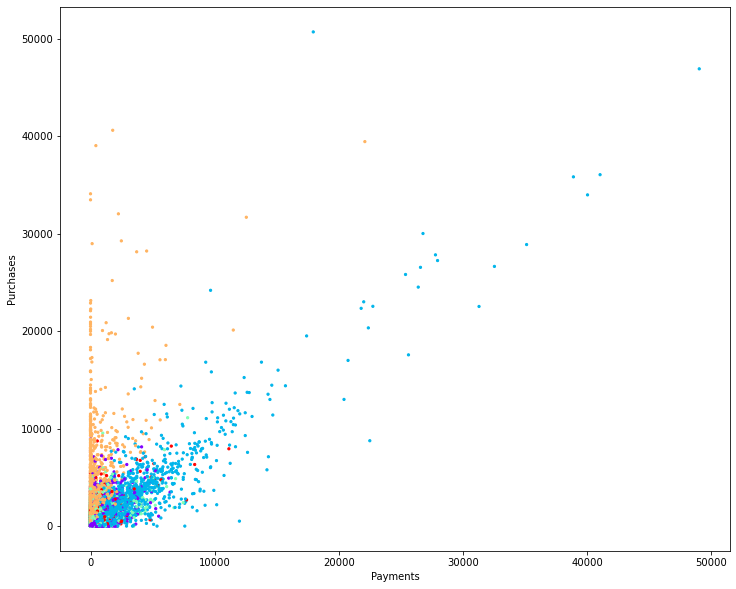

In [90]:
plt.figure(figsize =(12,10))
plt.scatter(data['PURCHASES'], data['PAYMENTS'], c = labels, s= 5, cmap ='rainbow') 
plt.xlabel('Payments')
plt.ylabel('Purchases')


In [91]:
import seaborn as sns

In [92]:
data['Clusters'] = labels

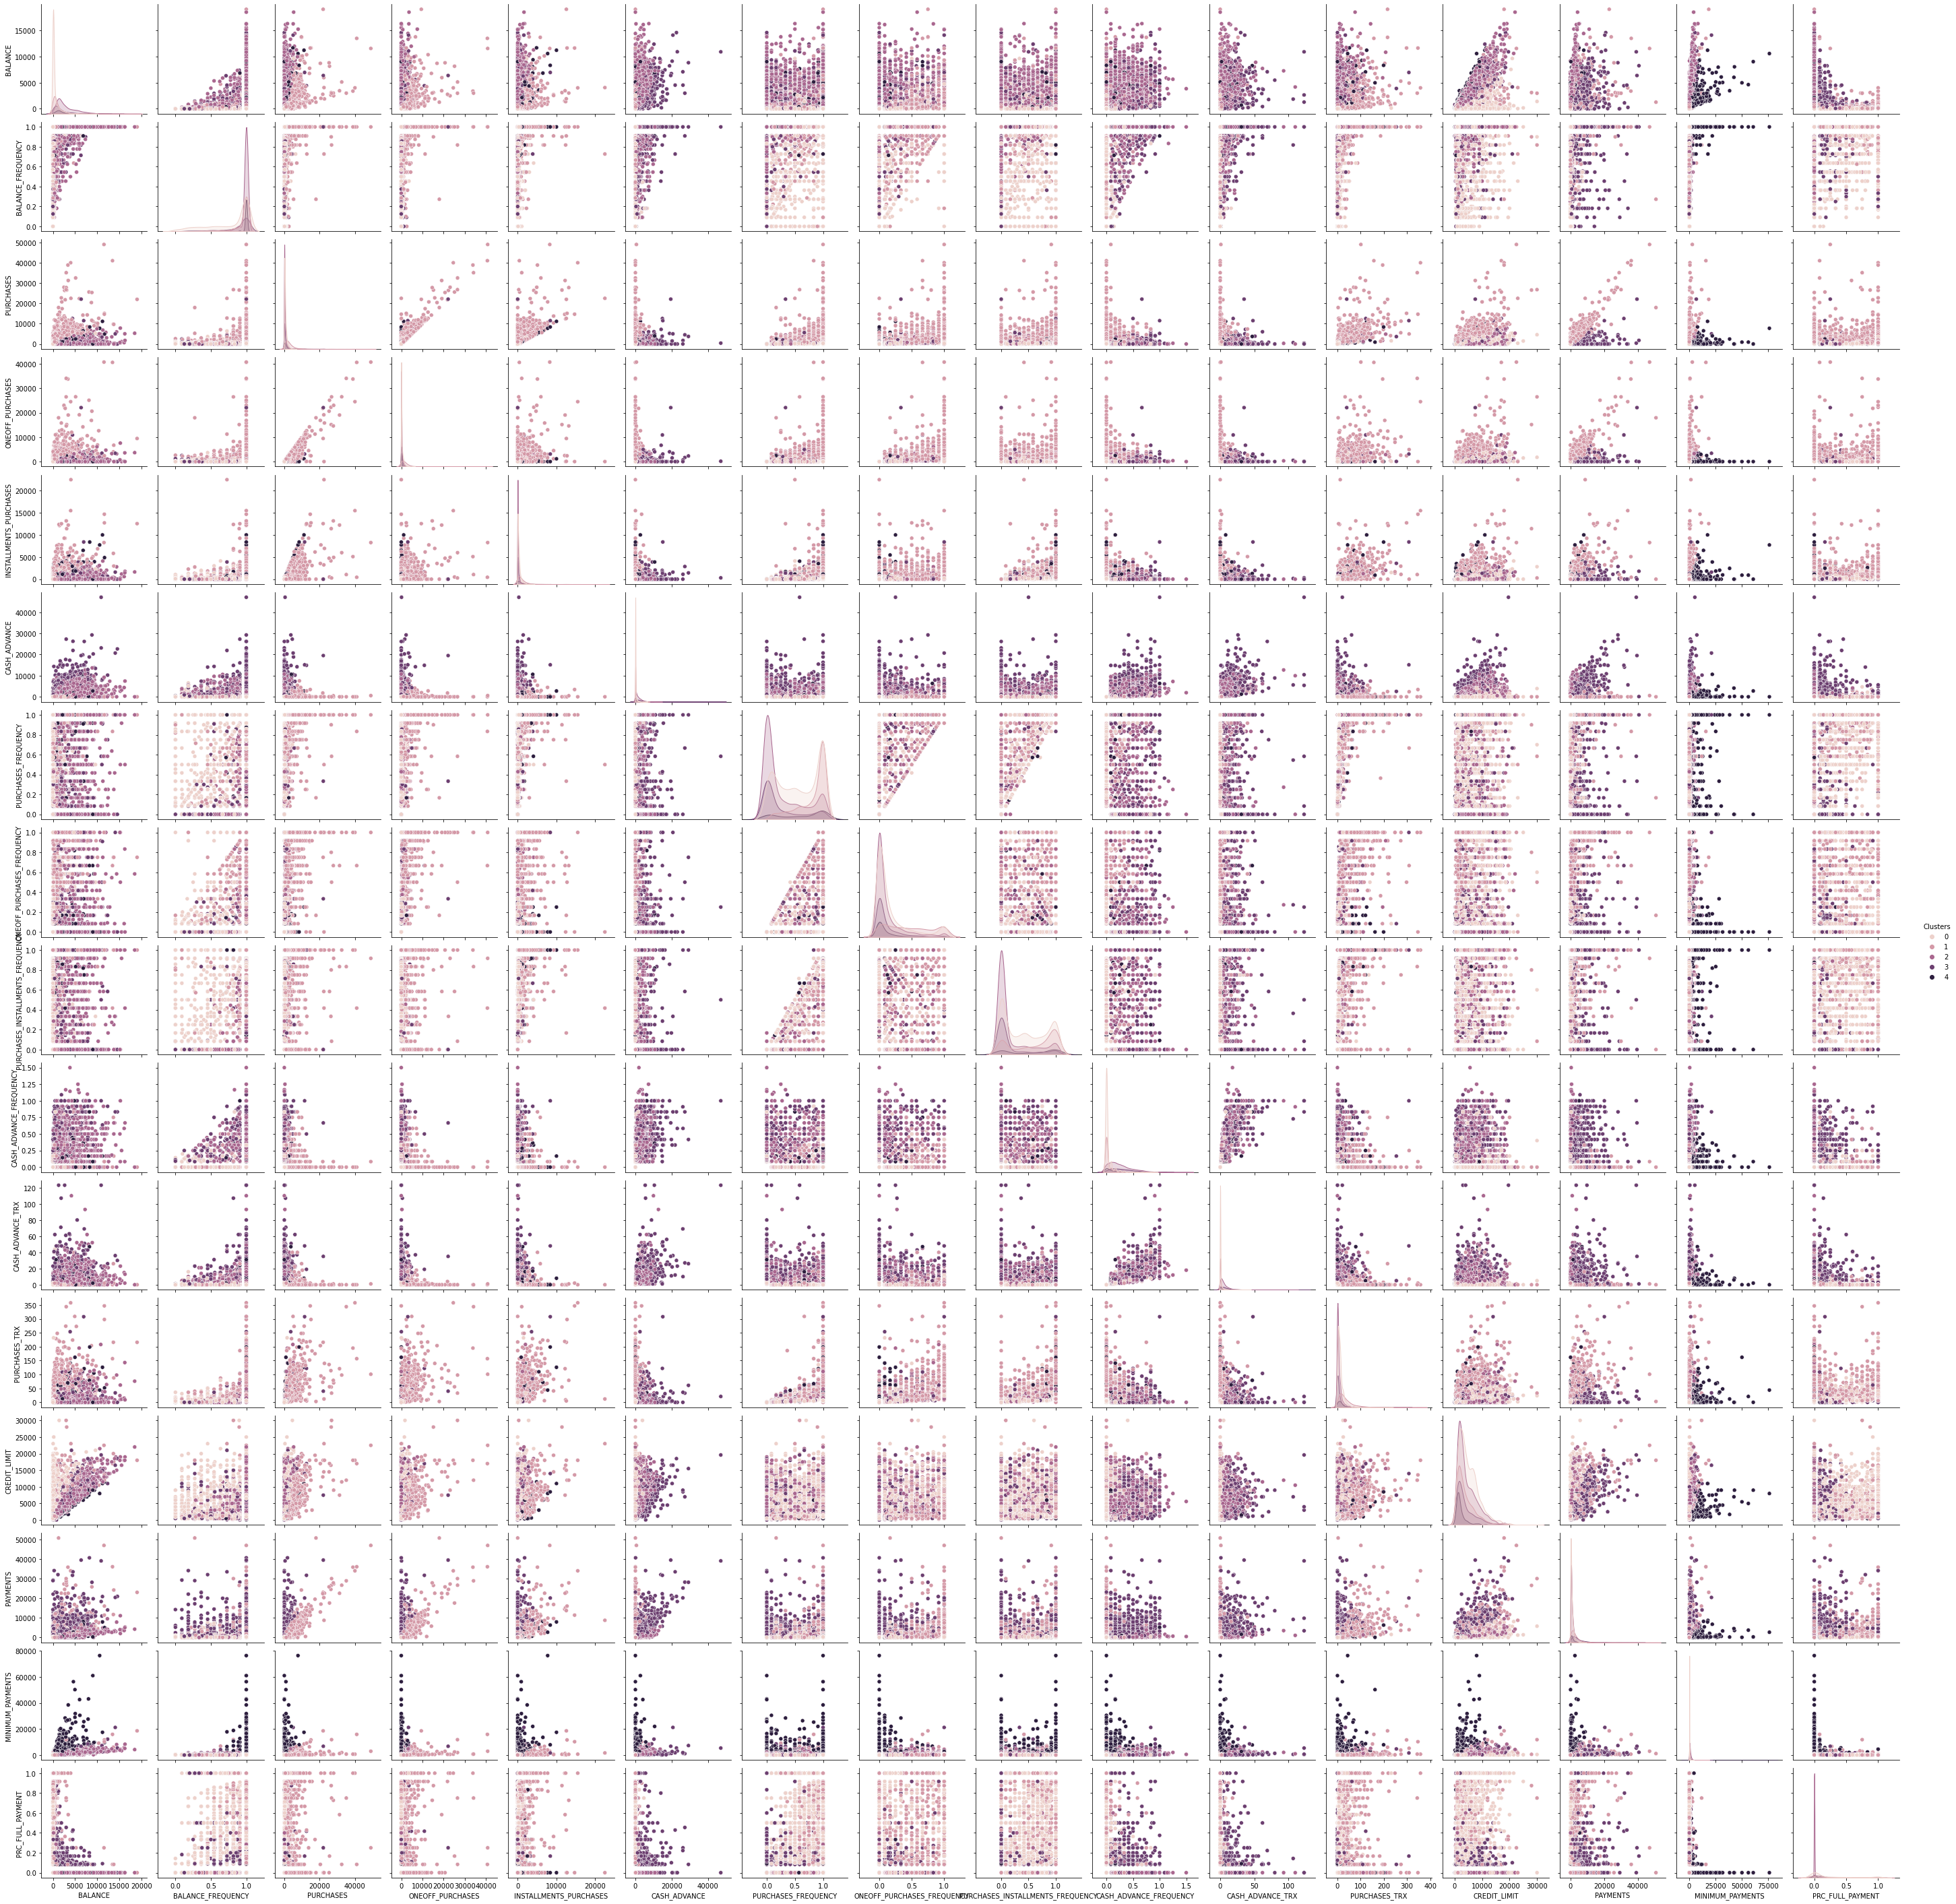

In [93]:
sns.pairplot(data[0:], hue = 'Clusters')

**<font color = 'blue' >Sometimes the visualization is not the best way to identify the clusters**</font>

# <font color='red'>Understanding the results</font>
<hr style='border: 2px solid red;'>

In [94]:
data.groupby('Clusters').describe()

BALANCE                                                    \
           count         mean          std        min          25%   
Clusters                                                             
0         3280.0   443.746756   846.398201   0.000000    23.365333   
1         1536.0  1141.865757  1664.809840   0.000000   212.178230   
2         2649.0  3037.962543  2478.838161   6.824905  1256.612223   
3         1073.0  1795.328292  1982.485775   0.000000   507.076999   
4          412.0  1987.146873  1852.215743  70.794108  1020.146724   

                                                 BALANCE_FREQUENCY            \
                  50%          75%           max             count      mean   
Clusters                                                                       
0           82.941478   410.126095   9630.367575            3280.0  0.774389   
1          554.332740  1370.056708  19043.138560            1536.0  0.928220   
2         2174.018945  4223.867789  18495.558550            2649.0  0.963740   
3         1088.056301  2315.003636  14581.459140            1073.0  0.862260   
4         1338.918346  2133.415063  11670.179850             412.0  0.989512   

          ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
          ...              75%           max            count      mean   
Clusters  ...                                                             
0         ...       248.733727   4483.503862           3280.0  0.246806   
1         ...       523.540210  18621.013310           1536.0  0.278331   
2         ...      1330.593643   8345.641905           2649.0  0.001799   
3         ...       884.183626  21235.065300           1073.0  0.117430   
4         ...      7086.774783  76406.207520            412.0  0.019271   

                                                       
               std  min  25%       50%       75%  max  
Clusters                                               
0         0.346748  0.0  0.0  0.000000  0.444444  1.0  
1         0.367137  0.0  0.0  0.083333  0.545455  1.0  
2         0.023260  0.0  0.0  0.000000  0.000000  0.6  
3         0.186772  0.0  0.0  0.083333  0.142857  1.0  
4         0.090795  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

### <font color='green'>Analyzing through centroids </font>
<hr style='border: 1px solid green;'>

In [99]:
centroids = kmeans.cluster_centers_

In [100]:
centroids

array([[6.90890221e-02, 2.30787435e-04, 1.21507361e-01, 4.79670320e-02,
        7.36405575e-02, 2.43310654e-02, 1.72863102e-04, 3.36686718e-05,
        1.40328311e-04, 7.92341768e-06, 1.23962309e-04, 2.86381277e-03,
        9.43564102e-01, 1.53799817e-01, 5.68529799e-02, 7.61493366e-05],
       [1.59872633e-01, 2.45335780e-04, 4.38628565e-01, 2.57276648e-01,
        1.81523763e-01, 2.58896564e-02, 2.04405504e-04, 8.91003532e-05,
        1.50573918e-04, 9.39953463e-06, 1.70012472e-04, 6.17608469e-03,
        6.03886132e-01, 4.02529446e-01, 8.52570022e-02, 7.19925505e-05],
       [5.04263792e-01, 2.72194282e-04, 6.17808431e-02, 3.62269020e-02,
        2.55756543e-02, 2.52903017e-01, 6.73170559e-05, 2.56975193e-05,
        4.50651626e-05, 5.74388410e-05, 1.15687334e-03, 1.33194105e-03,
        7.19174706e-01, 1.66205262e-01, 1.79245673e-01, 5.52303554e-07],
       [2.35130689e-01, 2.16418717e-04, 6.04525670e-02, 3.44569238e-02,
        2.60008529e-02, 3.99755165e-01, 5.26563547e-05, 2.052

**<font color = 'blue' >Centroid values for the 16 columns for each one of the 5 clusters**</font>

**This type of approach is good to identify columns with low value variance, this means that column probably, because of their similar values, will not be able to give us the specific characteristic of each cluster, so it can be discarded**

### <font color='green'>Calculating the variance for each centroid</font>
<hr style='border: 1px solid green;'>

**The columns with biggest variance will be our selected values**

**First we will collect the amount of attributes in centroids[] with the value 0 which means the first line, and everything will be in max, the maximum value of attributes.
We will do a for until the maximum value of attributes range(max) and then we will print() with the name of each one of the attributes writing dataframe.columns.values[i].

Then we can calculate the variance with .var(). We have the centroids[] we will get all the clusters for the attribute represented by i by writing : between the square brackets.

We will use the len() function receiving the centroids[0] for the size, and we will format the information view through the .format() function with a maximum of four places after the comma.

For that, we will write \n{:.4f} in quotes, with the type of the float number and the backslash for the line break that will improve the look of the out.**

In [101]:
max = len(centroids[0])
for i in range(max):
    print(data.columns.values[i], '\n{:.4f}'.format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0542
PRC_FULL_PAYMENT 
0.0000


**<font color = 'blue' >Selected Attributes:**</font>

### <font color='green'>Reanalyzing the clusters</font>
<hr style='border: 1px solid green;'>

In [103]:
description = data.groupby('Clusters')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

/var/folders/0h/x896y6yn107gp3wxmw7g6rk80000gp/T/ipykernel_61259/2441800837.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = data.groupby('Clusters')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']


In [108]:
n_clients = description.size()

In [111]:
description = description.mean()

**The mediam for evvery cluster for each one of the attributes:**

In [112]:
print(description.mean())

BALANCE             1681.210044
PURCHASES           1124.741291
CASH_ADVANCE        1129.840485
CREDIT_LIMIT        3986.854639
PAYMENTS            2174.536108
MINIMUM_PAYMENTS    1711.720430
dtype: float64


In [113]:
description['n_clients'] = n_clients

In [114]:
print(description)

              BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
Clusters                                                                      
0          443.746756   629.249107    141.482978   5130.547795   814.294226   
1         1141.865757  3274.071901    183.496011   4098.802182  3037.137165   
2         3037.962543   385.248630   1636.917210   4495.771989   968.890376   
3         1795.328292   476.810531   3267.199032   3982.452201  4713.384730   
4         1987.146873   858.326286    420.107194   2226.699029  1338.974045   

          MINIMUM_PAYMENTS  n_clients  
Clusters                               
0               228.519011       3280  
1               541.422553       1536  
2              1022.143477       2649  
3               734.167995       1073  
4              6032.349113        412  


# <font color='red'>Interpreting the clusters</font>
<hr style='border: 2px solid red;'>

In [115]:
data.groupby('Clusters')['PRC_FULL_PAYMENT'].describe()

count      mean       std  min  25%       50%       75%  max
Clusters                                                               
0         3280.0  0.246806  0.346748  0.0  0.0  0.000000  0.444444  1.0
1         1536.0  0.278331  0.367137  0.0  0.0  0.083333  0.545455  1.0
2         2649.0  0.001799  0.023260  0.0  0.0  0.000000  0.000000  0.6
3         1073.0  0.117430  0.186772  0.0  0.0  0.083333  0.142857  1.0
4          412.0  0.019271  0.090795  0.0  0.0  0.000000  0.000000  1.0

# <font color='red'>Using the clusters</font>
<hr style='border: 2px solid red;'>

**Basic results can tell us for example that the Cluster 1 with biggest purchases and best payers are a safe bet for example, for a increase on their credit limit**

**You can use the cluster 0 for example to create a group of test and control and execute other predictions**